# Exercises - GEO4902-03 - Ensemble Prediction

[Save as jupyter notebook, with your name in the filename, and upload on canvas]

# Exercise 03-01 - Ensemble prediction of a precipitation extreme event

In [2]:
# import packages
import xarray as xr
import numpy as np
import cartopy as cy
from matplotlib import pyplot as plt
from cmcrameri import cm

#### Load ensemble forecast

In [3]:
year =  '2019'
day  =  '13'
month = '07'
hour_1  ='06'

url = 'https://thredds.met.no/thredds/dodsC/mepsoldarchive/'+year+'/'+month+'/'+day+'/meps_subset_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)


In [4]:
year2 =  '2019'
day2  =  '12'
month2 = '07'
hour_2  ='06'

url = 'https://thredds.met.no/thredds/dodsC/mepsoldarchive/'+year2+'/'+month2+'/'+day2+'/meps_subset_2_5km_'+year2+month2+day2+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)


In [5]:
year3 =  '2019'
day3  =  '11'
month3 = '07'
hour_3  ='06'

url = 'https://thredds.met.no/thredds/dodsC/mepsoldarchive/'+year3+'/'+month3+'/'+day3+'/meps_subset_2_5km_'+year3+month3+day3+'T'+hour_3+'Z.nc'
forecast_3 = xr.open_dataset(url)
forecast_3

<xarray.Dataset> Size: 258GB
Dimensions:                                                         (
                                                                     ensemble_member: 10,
                                                                     hybrid2: 5,
                                                                     height0: 1,
                                                                     pressure: 5,
                                                                     time: 67,
                                                                     x: 889,
                                                                     y: 949,
                                                                     hybrid0: 1,
                                                                     height1: 1,
                                                                     height3: 1,
                                                                     height_above_msl: 1)
Coordinates: (12/13)
  * ensemble_member                                                 (ensemble_member) int16 20B ...
  * height0                                                         (height0) float32 4B ...
  * hybrid2                                                         (hybrid2) float64 40B ...
  * pressure                                                        (pressure) float32 20B ...
  * time                                                            (time) datetime64[ns] 536B ...
  * x                                                               (x) float32 4kB ...
    ...                                                              ...
  * height1                                                         (height1) float32 4B ...
  * height3                                                         (height3) float32 4B ...
  * height_above_msl                                                (height_above_msl) float32 4B ...
  * hybrid0                                                         (hybrid0) float64 8B ...
    latitude                                                        (y, x) float64 7MB ...
    longitude                                                       (y, x) float64 7MB ...
Data variables: (12/49)
    forecast_reference_time                                         datetime64[ns] 8B ...
    ap2                                                             (hybrid2) float64 40B ...
    b2                                                              (hybrid2) float64 40B ...
    p02                                                             float64 8B ...
    projection_lambert                                              int32 4B ...
    ap0                                                             (hybrid0) float64 8B ...
    ...                                                              ...
    snowfall_amount_acc                                             (time, height0, ensemble_member, y, x) float32 2GB ...
    wind_speed_of_gust                                              (time, height3, ensemble_member, y, x) float32 2GB ...
    x_wind_10m                                                      (time, height3, ensemble_member, y, x) float32 2GB ...
    x_wind_pl                                                       (time, pressure, ensemble_member, y, x) float64 23GB ...
    y_wind_10m                                                      (time, height3, ensemble_member, y, x) float32 2GB ...
    y_wind_pl                                                       (time, pressure, ensemble_member, y, x) float64 23GB ...
Attributes: (12/18)
    Conventions:                     CF-1.6
    institution:                     Norwegian Meteorological Institute, MET ...
    creator_url:                     met.no
    summary:                         MEPS (MetCoOp-Ensemble Prediction System...
    source:                          MEPS 2.5km
    min_time:                        2019-07-11 06:00:00Z
    ...                  

### Plot forecast on a map

# Comparing forecasts for member 0

Text(0.5, 1.0, 'Forecast init: 2019-07-11T06 \nShown: 2019-07-13T18')

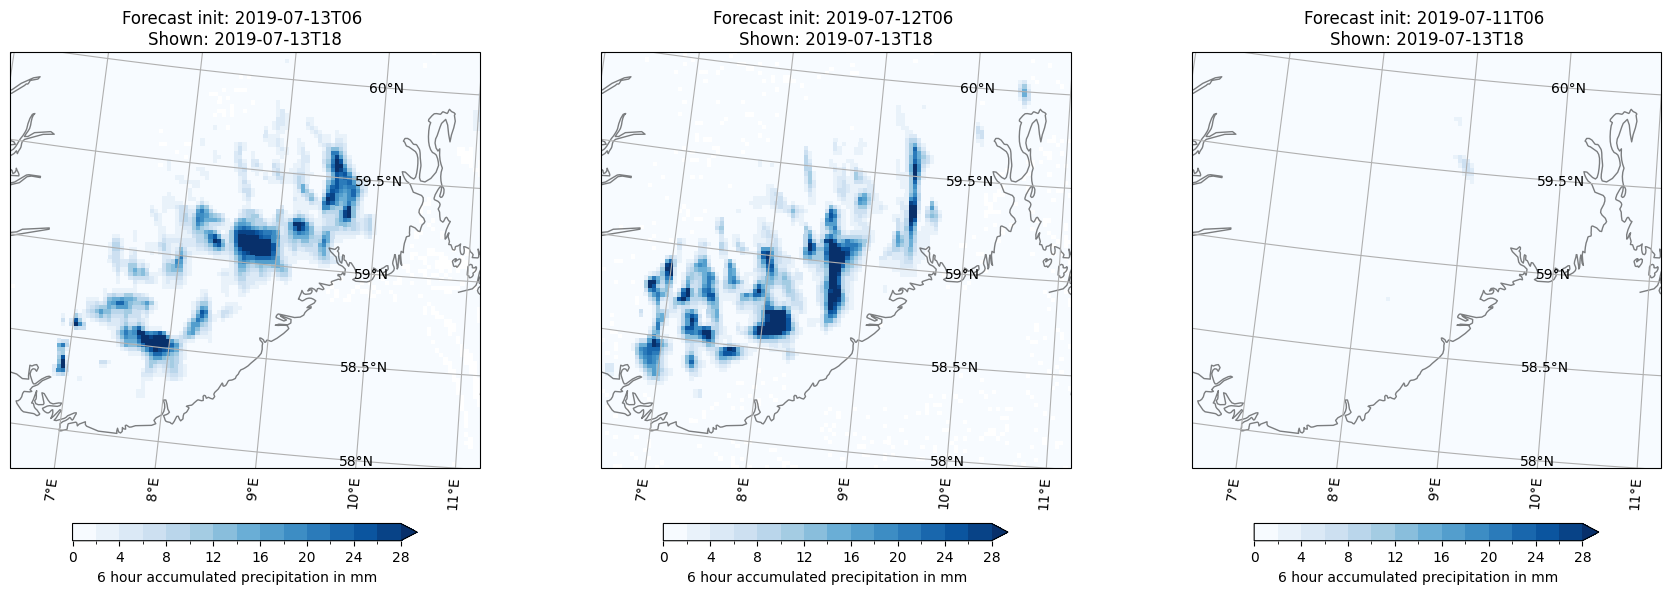

In [6]:
timestep1 = 12
timestep2 = timestep1 + 24
timestep3 = timestep2 + 24

mlevel = 0
member = 0

projection = cy.crs.Stereographic(central_latitude=75, central_longitude=15.0, )
f, (axsm1, axsm2, axsm3) = plt.subplots(1,3, subplot_kw={'projection':projection}, figsize=[3*7.2, 7.2])

# plot cosmetics
axsm1.set_extent([6.5, 11, 58, 60], cy.crs.PlateCarree())
axsm1.add_feature(cy.feature.COASTLINE, alpha=0.5)
axsm1.add_feature(cy.feature.BORDERS, alpha=0.5)
gl = axsm1.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=True

acc_p_now = forecast_1['precipitation_amount_acc'].isel(time=timestep1, height0=mlevel, ensemble_member=member)
if timestep1 - 6 >= 0:
    acc_p_6h_ago = forecast_1['precipitation_amount_acc'].isel(time=timestep1-6, height0=mlevel, ensemble_member=member)
    acc_6h_p = acc_p_now - acc_p_6h_ago
    
else:
    print('Less that 6 previous time steps')
    acc_6h_p = acc_p_now

acc_6h_p.plot.pcolormesh(ax=axsm1, 
                        x='longitude', 
                        y='latitude',
                        cmap='Blues',
                        extend='max',
                        levels=np.arange(0,30,2),
                        transform=cy.crs.PlateCarree(),
                        cbar_kwargs={'orientation':'horizontal','label':'6 hour accumulated precipitation in mm', 'shrink':0.7, 'pad':0.1})

axsm1.set_title(f"Forecast init: {np.datetime_as_string(forecast_1.time[0],unit='h')} \nShown: {np.datetime_as_string(forecast_1.time[timestep1],unit='h')}")

# earlier inint forecast
axsm2.set_extent([6.5, 11, 58, 60], cy.crs.PlateCarree())
axsm2.add_feature(cy.feature.COASTLINE, alpha=0.5)
axsm2.add_feature(cy.feature.BORDERS, alpha=0.5)
gl = axsm2.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=True

acc_p_now = forecast_2['precipitation_amount_acc'].isel(time=timestep2, height0=mlevel, ensemble_member=member)
if timestep2 - 6 >= 0:
    acc_p_6h_ago = forecast_2['precipitation_amount_acc'].isel(time=timestep2-6, height0=mlevel, ensemble_member=member)
    acc_6h_p = acc_p_now - acc_p_6h_ago
    
else:
    print('Less that 6 previous time steps')
    acc_6h_p = acc_p_now

acc_6h_p.plot.pcolormesh(ax=axsm2, 
                        x='longitude', 
                        y='latitude',
                        cmap='Blues',
                        extend='max',
                        levels=np.arange(0,30,2),
                        transform=cy.crs.PlateCarree(),
                        cbar_kwargs={'orientation':'horizontal','label':'6 hour accumulated precipitation in mm', 'shrink':0.7, 'pad':0.1})

axsm2.set_title(f"Forecast init: {np.datetime_as_string(forecast_2.time[0],unit='h')} \nShown: {np.datetime_as_string(forecast_2.time[timestep2],unit='h')}")

# even earlier inint forecast
axsm3.set_extent([6.5, 11, 58, 60], cy.crs.PlateCarree())
axsm3.add_feature(cy.feature.COASTLINE, alpha=0.5)
axsm3.add_feature(cy.feature.BORDERS, alpha=0.5)
gl = axsm3.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=True

acc_p_now = forecast_3['precipitation_amount_acc'].isel(time=timestep3, height0=mlevel, ensemble_member=member)
if timestep3 - 6 >= 0:
    acc_p_6h_ago = forecast_3['precipitation_amount_acc'].isel(time=timestep3-6, height0=mlevel, ensemble_member=member)
    acc_6h_p = acc_p_now - acc_p_6h_ago
    
else:
    print('Less that 6 previous time steps')
    acc_6h_p = acc_p_now

acc_6h_p.plot.pcolormesh(ax=axsm3, 
                        x='longitude', 
                        y='latitude',
                        cmap='Blues',
                        extend='max',
                        levels=np.arange(0,30,2),
                        transform=cy.crs.PlateCarree(),
                        cbar_kwargs={'orientation':'horizontal','label':'6 hour accumulated precipitation in mm', 'shrink':0.7, 'pad':0.1})

axsm3.set_title(f"Forecast init: {np.datetime_as_string(forecast_3.time[0],unit='h')} \nShown: {np.datetime_as_string(forecast_3.time[timestep3],unit='h')}")

Here we see the forecast for the 6-hour accumulated precipitation from 2019-07-13 12UTC until 2019-07-13 18UTC based on three different lead times. There is a noticeable difference in the spatial distribution of the even forecast on the same day and the day before. Two days before the event does not even show up.

# Comparing members for forecast 1

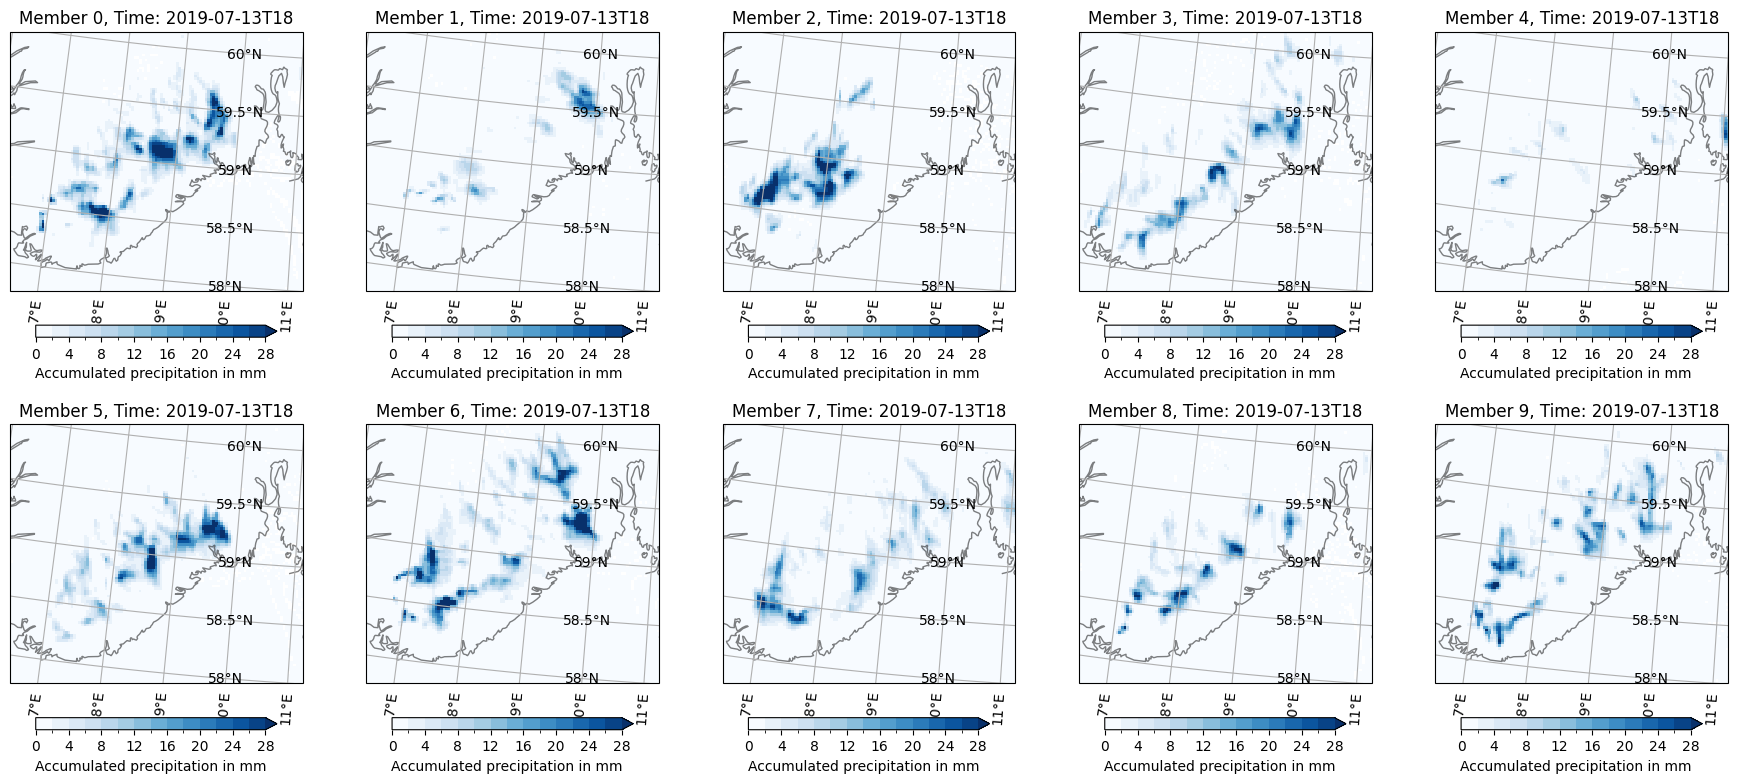

In [7]:
timestep = 12
mlevel = 0

# Define the projection for all subplots
projection = cy.crs.Stereographic(central_latitude=75, central_longitude=15.0)

# Create a figure with 2 rows and 5 columns for 10 ensemble members
f, axes = plt.subplots(2, 5, subplot_kw={'projection': projection}, figsize=[18, 8])

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop over the ensemble members
for member in range(10):
    axsm = axes[member]
    
    # Set plot extent and add features for each subplot
    axsm.set_extent([6.5, 11, 58, 60], cy.crs.PlateCarree())
    axsm.add_feature(cy.feature.COASTLINE, alpha=0.5)
    axsm.add_feature(cy.feature.BORDERS, alpha=0.5)
    
    # Configure gridlines
    gl = axsm.gridlines(draw_labels=True)
    gl.top_labels = False
    
    # Plot the accumulated precipitation for each ensemble member
    acc_p_now = forecast_1['precipitation_amount_acc'].isel(time=timestep1, height0=mlevel, ensemble_member=member)
    if timestep1 - 6 >= 0:
        acc_p_6h_ago = forecast_1['precipitation_amount_acc'].isel(time=timestep1-6, height0=mlevel, ensemble_member=member)
        acc_6h_p = acc_p_now - acc_p_6h_ago
        
    else:
        print('Less that 6 previous time steps')
        acc_6h_p = acc_p_now
    acc_6h_p.plot.pcolormesh(
        ax=axsm, 
        x='longitude', 
        y='latitude',
        cmap='Blues',
        extend='max',
        levels=np.arange(0, 30, 2),
        transform=cy.crs.PlateCarree(),
        cbar_kwargs={'orientation': 'horizontal', 'label': 'Accumulated precipitation in mm', 'shrink': 0.7, 'pad': 0.1}
    )
    
    # Set the title for each subplot with the ensemble member number
    axsm.set_title(f"Member {member}, Time: {np.datetime_as_string(forecast_1.time[timestep], unit='h')}")

plt.tight_layout()

Here we observe large differences between ensemble members. When computing a forecast product that combines the information of the 10 ensemble members but still gives information about the severity of the forecasted weather situation I first thought of the ensemble mean and spread. The issue then is that although the ensemble mean theoretically gives the prediction with the lowest RMSE compared to the true state, it also averages out extremes.

Therefore, the following two products seem more suitable:
- Probability of exceedance plot (with a 20 mm threshold)
  - To show the likelihood that the 6-hourly accumulated precipitation will exceed 20 mm based on the 10 ensemble members. Here we see which region will likely see the most extreme precipitation.
- Ensemble percentiles plot
  - Giving an idea of a conservative, average and extreme precipitation scenario based on the 10 ensemble members


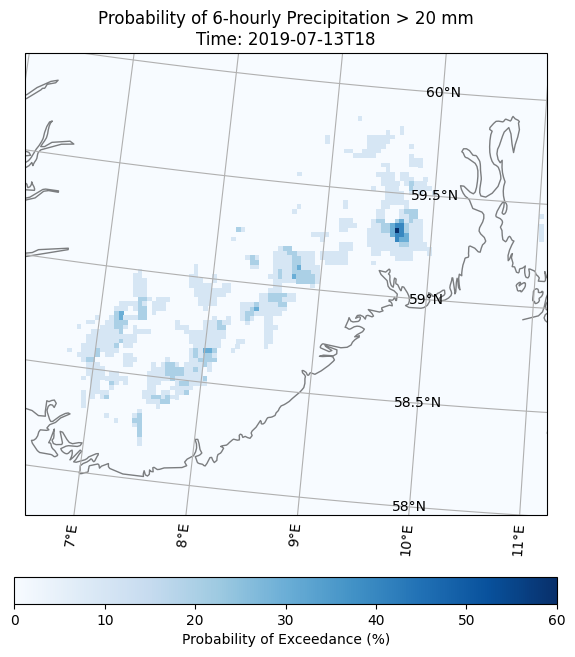

In [8]:

# Define the threshold for exceedance
threshold = 20 # mm

# Initialize a count array for counting how many members exceed the threshold at each grid point
exceedance_count = np.zeros_like(forecast_1['precipitation_amount_acc'].isel(time=timestep, height0=mlevel, ensemble_member=0))

# Loop over each ensemble member to count threshold exceedances
for member in range(10):
    acc_p_now = forecast_1['precipitation_amount_acc'].isel(time=timestep, height0=mlevel, ensemble_member=member)
    if timestep - 6 >= 0:
        acc_p_6h_ago = forecast_1['precipitation_amount_acc'].isel(time=timestep-6, height0=mlevel, ensemble_member=member)
        acc_6h_p = acc_p_now - acc_p_6h_ago
    else:
        acc_6h_p = acc_p_now

    # Increment count where the 6-hourly accumulated precipitation exceeds the threshold
    exceedance_count += acc_6h_p > threshold

# Calculate probability as a percentage
exceedance_probability = (exceedance_count / 10) * 100  # 10 ensemble members

# Plotting the probability of exceedance
f, ax = plt.subplots(1, 1, subplot_kw={'projection': projection}, figsize=[10, 8])
ax.set_extent([6.5, 11, 58, 60], crs=cy.crs.PlateCarree())
ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
ax.add_feature(cy.feature.BORDERS, alpha=0.5)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False


# Plot the probability of exceedance
exceedance_plot = ax.pcolormesh(
    forecast_1['longitude'],
    forecast_1['latitude'],
    exceedance_probability,
    cmap='Blues',
    transform=cy.crs.PlateCarree(),
    shading='auto'
)

# Add colorbar
cbar = plt.colorbar(exceedance_plot, orientation='horizontal', pad=0.1, shrink=0.7, label='Probability of Exceedance (%)')
ax.set_title(f"Probability of 6-hourly Precipitation > {threshold} mm\nTime: {np.datetime_as_string(forecast_1.time[timestep], unit='h')}")
plt.show()

Here only a small are a round Skien is 60% likely to have more than 20 mm of precipitation.

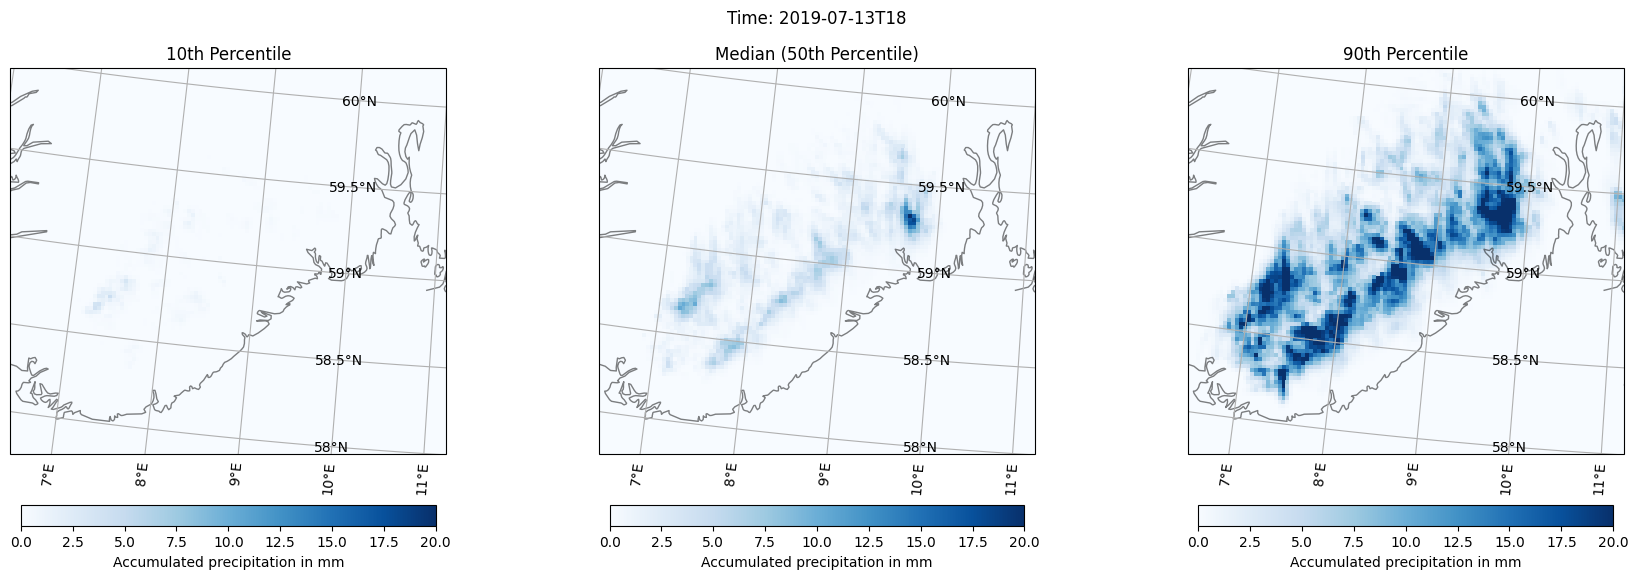

In [9]:
# Gather accumulated precipitation for each ensemble member over 6 hours
accumulations = []
for member in range(10):
    acc_p_now = forecast_1['precipitation_amount_acc'].isel(time=timestep, height0=mlevel, ensemble_member=member)
    if timestep - 6 >= 0:
        acc_p_6h_ago = forecast_1['precipitation_amount_acc'].isel(time=timestep-6, height0=mlevel, ensemble_member=member)
        acc_6h_p = acc_p_now - acc_p_6h_ago
    else:
        acc_6h_p = acc_p_now
    accumulations.append(acc_6h_p)

# Convert to array and calculate percentiles
accumulations_array = np.stack(accumulations)
percentile_10 = np.percentile(accumulations_array, 10, axis=0)
percentile_50 = np.percentile(accumulations_array, 50, axis=0)
percentile_90 = np.percentile(accumulations_array, 90, axis=0)

# Plotting the percentiles
fig, axes = plt.subplots(1, 3, subplot_kw={'projection': projection}, figsize=(18, 6))

for ax, percentile_data, perc_label in zip(
    axes, [percentile_10, percentile_50, percentile_90], ['10th Percentile', 'Median (50th Percentile)', '90th Percentile']
):
    ax.set_extent([6.5, 11, 58, 60], crs=cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    
    percentile_plot = ax.pcolormesh(
        forecast_1['longitude'],
        forecast_1['latitude'],
        percentile_data,
        cmap='Blues',
        shading='auto',
        transform=cy.crs.PlateCarree(),
        vmin=0, vmax=20
    )
    
    cbar = plt.colorbar(percentile_plot, ax=ax, orientation='horizontal', pad=0.1, shrink=0.7, label='Accumulated precipitation in mm')
    ax.set_title(perc_label)

plt.suptitle(f"Time: {np.datetime_as_string(forecast_1.time[timestep], unit='h')}")
plt.tight_layout()
plt.show()


Here the max value of the color bar has been chosen to be 20 mm to make it somewhat comparable to the previous probability of exceedance plot.

The 10th percentile shows a very conservative scenario, 90% of the ensemble members predict more precipitation than this.

The 50th percentile is right in the middle, with half the ensemble member forecasting more precipitation and half less.

Lastly, the 90th percentile gives a good idea of what an extreme scenario may look like, although unlikely since 90% of the ensembles predict less precipitation. 